# (Loan Data from Prosper) 
## by (Mohammed Nasser)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others. [Loan Data Last updated 03/11/2014]
.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> load Data

In [3]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.shape

(113937, 81)

In [5]:
df2 = df[['ListingKey','ProsperRating (Alpha)', 'EmploymentStatus', 'BorrowerAPR', 
                  'StatedMonthlyIncome', 'Term','LoanOriginalAmount', 'DebtToIncomeRatio', 'TotalTrades', 
                  'IncomeRange' , 'IsBorrowerHomeowner' , 'CurrentCreditLines' , 'OpenRevolvingAccounts']]


In [6]:
df2.shape

(113937, 13)

In [7]:
df2.ListingKey.duplicated().sum()

871

In [8]:
#remove ListingKey duplicates
df2.drop_duplicates(subset=['ListingKey'], inplace=True)
print(df2.ListingKey.duplicated().sum())

0


C:\Users\Mohammed\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [9]:
# findig the missing rows 
df2.isna().sum().sort_values(ascending = False)

ProsperRating (Alpha)    29084
DebtToIncomeRatio         8472
CurrentCreditLines        7604
TotalTrades               7544
EmploymentStatus          2255
BorrowerAPR                 25
ListingKey                   0
StatedMonthlyIncome          0
Term                         0
LoanOriginalAmount           0
IncomeRange                  0
IsBorrowerHomeowner          0
OpenRevolvingAccounts        0
dtype: int64

In [10]:
#remove the missing row 
df2 = df2[~ df2['ProsperRating (Alpha)'].isna()]
df2 = df2[~ df2['DebtToIncomeRatio'].isna()]
df2 = df2[~ df2['EmploymentStatus'].isna()]

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76768 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ListingKey             76768 non-null  object 
 1   ProsperRating (Alpha)  76768 non-null  object 
 2   EmploymentStatus       76768 non-null  object 
 3   BorrowerAPR            76768 non-null  float64
 4   StatedMonthlyIncome    76768 non-null  float64
 5   Term                   76768 non-null  int64  
 6   LoanOriginalAmount     76768 non-null  int64  
 7   DebtToIncomeRatio      76768 non-null  float64
 8   TotalTrades            76768 non-null  float64
 9   IncomeRange            76768 non-null  object 
 10  IsBorrowerHomeowner    76768 non-null  bool   
 11  CurrentCreditLines     76768 non-null  float64
 12  OpenRevolvingAccounts  76768 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 7.7+ MB


### What is the structure of your dataset?

> the data contains 113,937 rows with 81 features ,After selecting and cleaning the features, there are 76,768 rows with 13 features.


### What is/are the main feature(s) of interest in your dataset?

> I'm mainly interested in determining which features are most effective in protecting ProsperRating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> EmploymentStatus ,BorrowerAPR,StatedMonthlyIncome,IncomeRange,Term,LoanOriginalAmount,DebtToIncomeRatio,IsBorrowerHomeowner                      

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

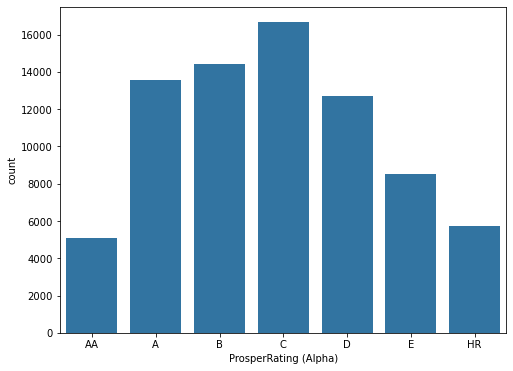

In [81]:
order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
plt.figure(figsize=(8, 6))
color_base = sb.color_palette()[0]
sb.countplot( data = df2 , x ='ProsperRating (Alpha)' , order = order , color = color_base);

The majority of people in the medium level of loanRisks

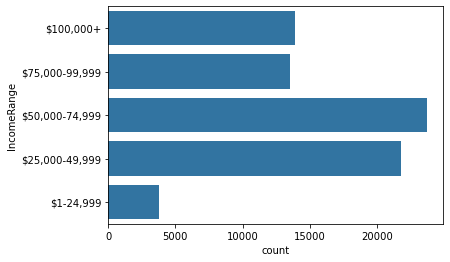

In [13]:
order = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999']
sb.countplot( data = df2 , y ='IncomeRange' , order = order , color = color_base);

The amount of people taking out loans in the middle income group is higher.

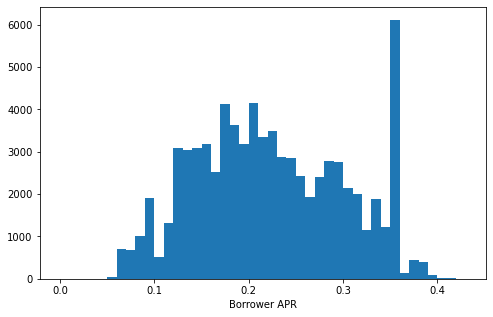

In [14]:
bins = np.arange(0 , df2.BorrowerAPR.max()+.01 , .01)
plt.figure(figsize=[8,5])
plt.hist(df2.BorrowerAPR , bins = bins)
plt.xlabel('Borrower APR');


APR distribution is multimodal, with a minor peak in 0.1, a large peak in 0.2, and also a very massive peak in 0.36, and then only a few loans have an APR greater than 0.4 .

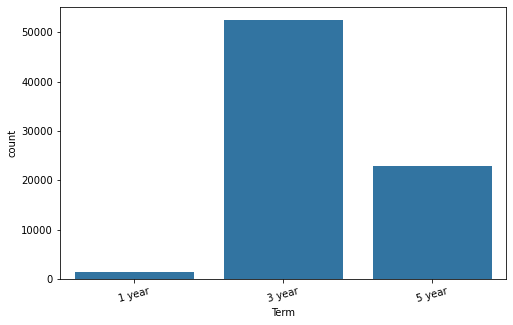

In [15]:
plt.figure(figsize=[8,5])
sb.countplot(data = df2 , x = 'Term' ,  color =color_base)
plt.xlabel('Term');
plt.xticks([0,1,2],['1 year' , '3 year','5 year'] , rotation = 15);


The majority of people prefer three-year loans.

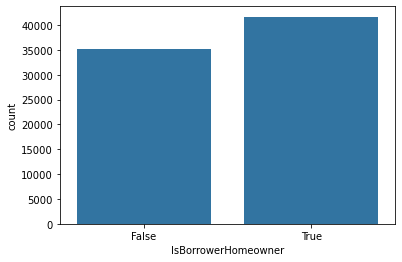

In [16]:
sb.countplot(data = df2 , x = 'IsBorrowerHomeowner' ,  color =color_base )
plt.xlabel('IsBorrowerHomeowner');

At least 45% of borrowers doesn't own a home.

(0.0, 2.0)

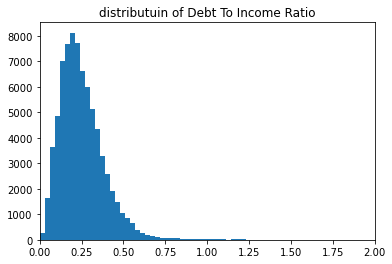

In [17]:
bins = np.arange(0 , df2.DebtToIncomeRatio.max()+.03 , 0.03)
plt.hist(df2.DebtToIncomeRatio , bins = bins)
plt.title('distributuin of Debt To Income Ratio')
plt.xlim(0,2)

It is a unimodel distribution that is slightly skewed to the right.

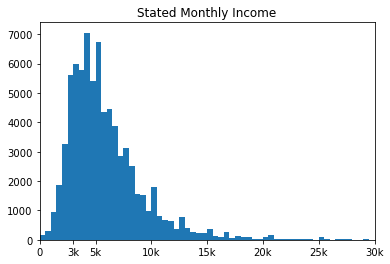

In [18]:
bins = np.arange(0, df2.StatedMonthlyIncome.max()+500, 500)
plt.hist(df2.StatedMonthlyIncome, bins=bins);
ticks = [0,3000,5000, 10000, 15000, 20000, 25000,30000, 35000] 
ticks_labels = [0,'3k','5k','10k','15k','20k','25k','30k','30k']
plt.xticks(ticks , ticks_labels );
plt.title('Stated Monthly Income')
plt.xlim((0,30000));

The majority of borrowers have monthly incimes ranging from 3k to 10k.

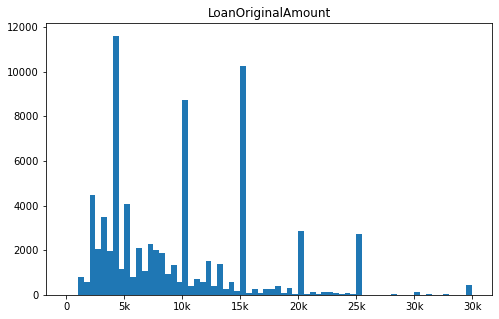

In [19]:
bins = np.arange(0 , df2.LoanOriginalAmount.max() +500 , 500 )
plt.figure(figsize=[8,5])
plt.hist(df2.LoanOriginalAmount, bins=bins);
plt.title('LoanOriginalAmount');
ticks = [0,5000, 10000, 15000, 20000, 25000,30000, 35000] 
ticks_labels = [0,'5k','10k','15k','20k','25k','30k','30k']
plt.xticks(ticks , ticks_labels );

More people preferred loans ranging from 5,000 to 15,000  and There are large peaks in (5K, 10K, 15K, 20K, 35K), which might be due to loan standards or banking regulations.

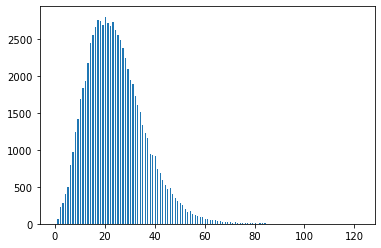

In [20]:
bins = np.arange(0 ,df2.TotalTrades.max() + .5 , .5)
plt.hist(df2.TotalTrades, bins = bins);

its a right skewed distribution

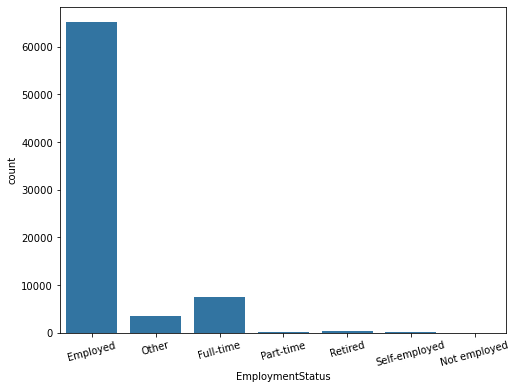

In [21]:
plt.figure(figsize=[8,6])
sb.countplot(data = df2 ,x  = 'EmploymentStatus' , color = color_base);
plt.xticks(rotation = 15);

The majority of the people in this set are employed.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The rating has a unimodal distribution, although most people take low or medium risks and 3Year loans, and the majority of browwers are employed and have a monthly income ranging from 3,500 to 10,000, and the majority of loans taken are (eg. 5K , 10K , 15K)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>The borrower distribution APR appears to be multimodal, with the majority ranging from (0.1 to 0.4), and I had to set a limit due to outliers in DebtToIncomeRatio and StatedMonthlyIncome.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76768 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ListingKey             76768 non-null  object 
 1   ProsperRating (Alpha)  76768 non-null  object 
 2   EmploymentStatus       76768 non-null  object 
 3   BorrowerAPR            76768 non-null  float64
 4   StatedMonthlyIncome    76768 non-null  float64
 5   Term                   76768 non-null  int64  
 6   LoanOriginalAmount     76768 non-null  int64  
 7   DebtToIncomeRatio      76768 non-null  float64
 8   TotalTrades            76768 non-null  float64
 9   IncomeRange            76768 non-null  object 
 10  IsBorrowerHomeowner    76768 non-null  bool   
 11  CurrentCreditLines     76768 non-null  float64
 12  OpenRevolvingAccounts  76768 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 9.7+ MB


In [23]:
numeric_vars = ['BorrowerAPR'  , 'StatedMonthlyIncome','LoanOriginalAmount','DebtToIncomeRatio','TotalTrades','IncomeRange','CurrentCreditLines','OpenRevolvingAccounts','IsBorrowerHomeowner']
catgoric_vars =['ProsperRating (Alpha)' , 'EmploymentStatus' ,'Term']

<AxesSubplot:>

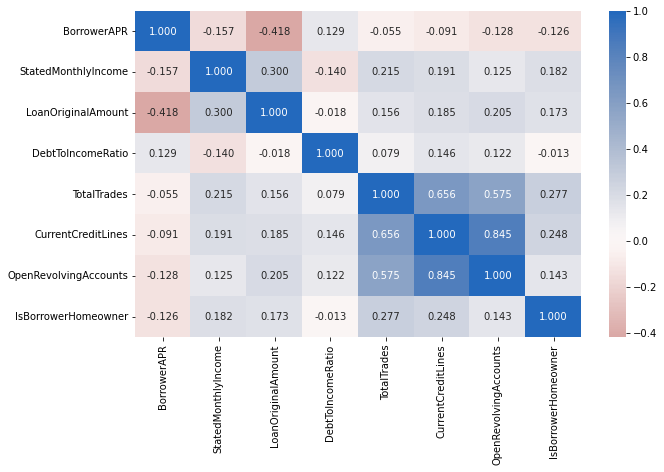

In [24]:
#Correlation Plot
plt.figure(figsize = [10,6])
sb.heatmap(df2[numeric_vars].corr() , annot=True ,fmt ='.3f' , cmap='vlag_r',center=0)

Surprisingly, APR has no strong correlation with other features but appears to have a minor relation with loan original amount, which we will analyse, and you can observe a strong correlation between Open Revolving Accounts, Current CreditLines.

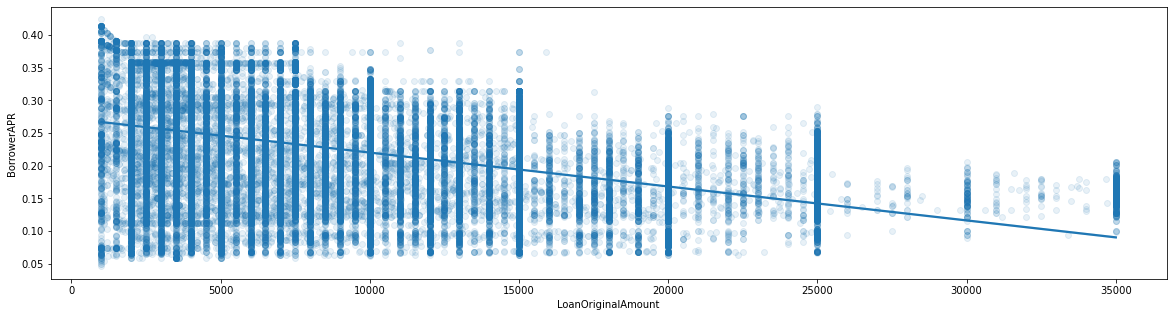

In [25]:
plt.figure(figsize=(20,5))
sb.regplot(data = df2 , y = 'BorrowerAPR' , x = 'LoanOriginalAmount' ,scatter_kws={'alpha': 1/10});


Obviously, the bigger the loan amount, the lower the APR.

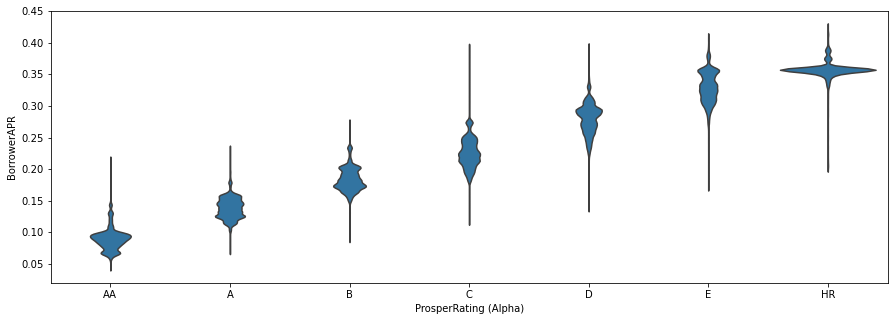

In [51]:
plt.figure(figsize = [15,5])
order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sb.violinplot(data = df2 , x = 'ProsperRating (Alpha)' , y ='BorrowerAPR' , order = order , color =color_base , inner = None);

we can notice that The larger the risk, the higher the APR,

(0.0, 10000.0)

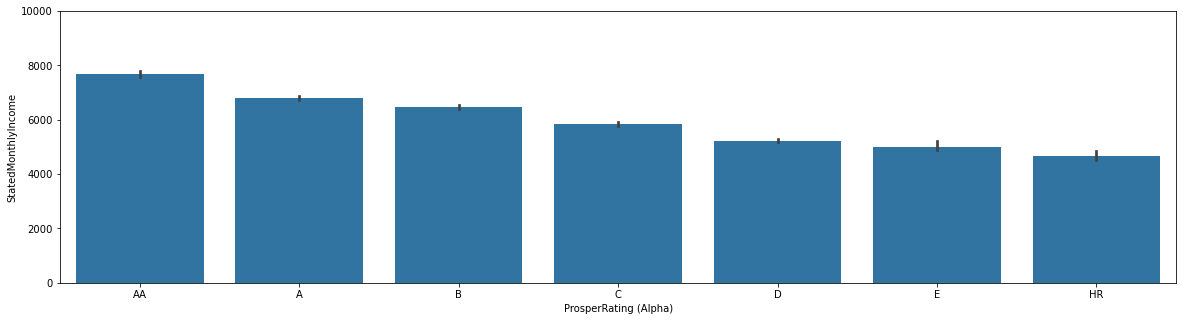

In [27]:
plt.figure(figsize=(20,5))
sb.barplot(data = df2 , x = 'ProsperRating (Alpha)' , y ='StatedMonthlyIncome', order = order , color=color_base);
plt.ylim(0 , 10000)

StatedMonthlyIncome has a relatively tiny influence on rating because as money increases, people pick less riskier ratings.

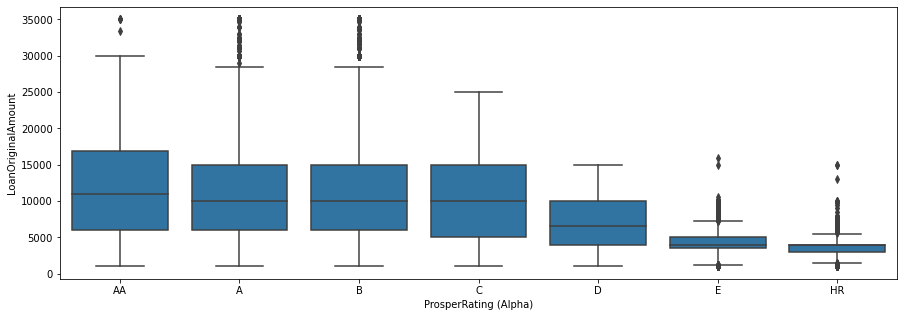

In [28]:
plt.figure(figsize = [15,5])
sb.boxplot(data = df2 , x = 'ProsperRating (Alpha)' , y ='LoanOriginalAmount' , order = order , color =color_base );

Unsurprisingly, with a large loan amount, the borrower chooses a less risky rating, while just a few with a small loan amount pick a high risk rating.

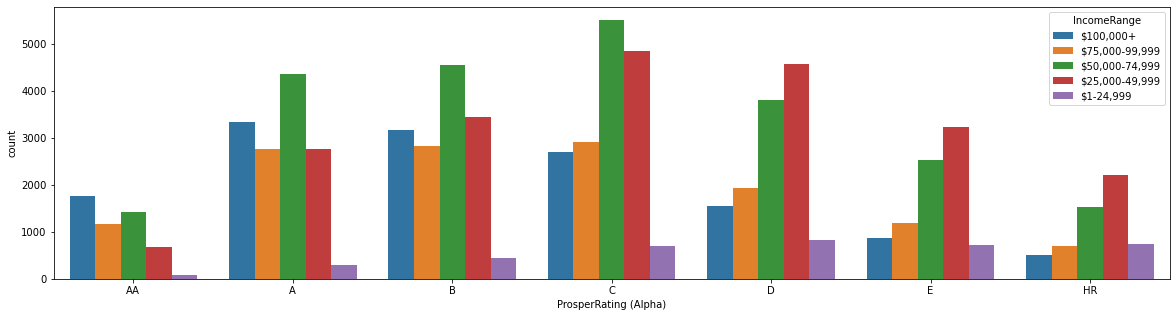

In [50]:
plt.figure(figsize=(20,5))
income_order = ['$100,000+', '$75,000-99,999', '$50,000-74,999','$25,000-49,999', '$1-24,999']
sb.countplot(data = df2, x = 'ProsperRating (Alpha)', 
              hue = 'IncomeRange', order=order, hue_order=income_order);

People with a salary of 50,000 to 75,000 likely to take modest to moderately risks. People with a salary of 25,000 to 50,000, on the other hand, tend to take significantly greater risks.

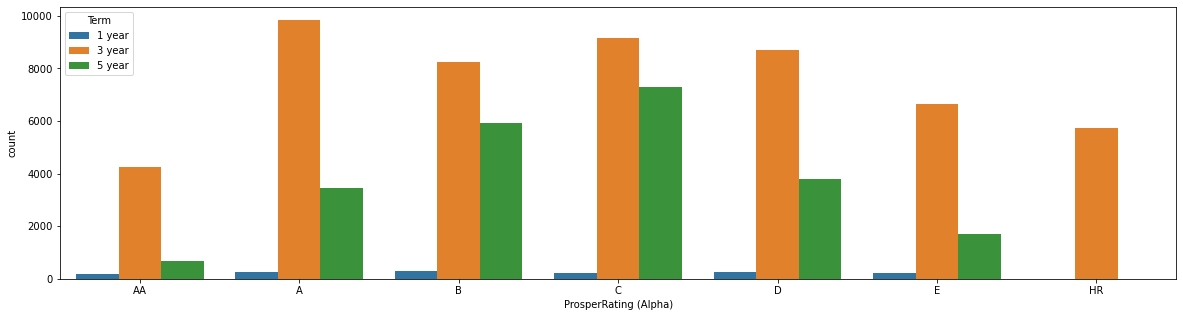

In [30]:
plt.figure(figsize=(20,5))
sb.countplot(data = df2, x = 'ProsperRating (Alpha)', hue = 'Term', order=order)
plt.legend(labels = ['1 year' , '3 year','5 year'] ,title ='Term');

3 years loans appear to have conquered all ratings, specifically HR rating, with no one appearing to have chosen any 1 or 5 year in HR rating.

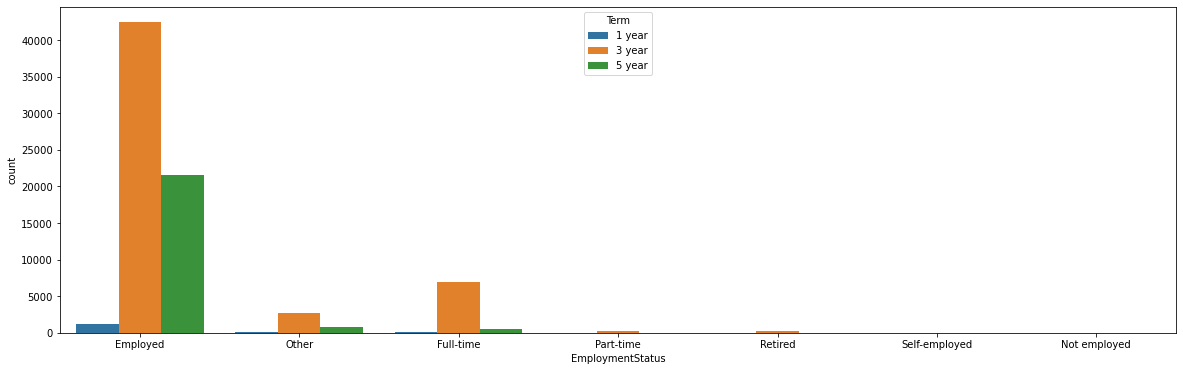

In [31]:
plt.figure(figsize=(20,6))
sb.countplot(data = df2 , x = 'EmploymentStatus' , hue = 'Term')
plt.legend(loc =9 , labels = ['1 year' , '3 year','5 year'] ,title ='Term');


Clearly, the majority of full-time, part-time, retired, and other employees prefer the three-year term, while only a tiny percentage of employed pick the one-year period.

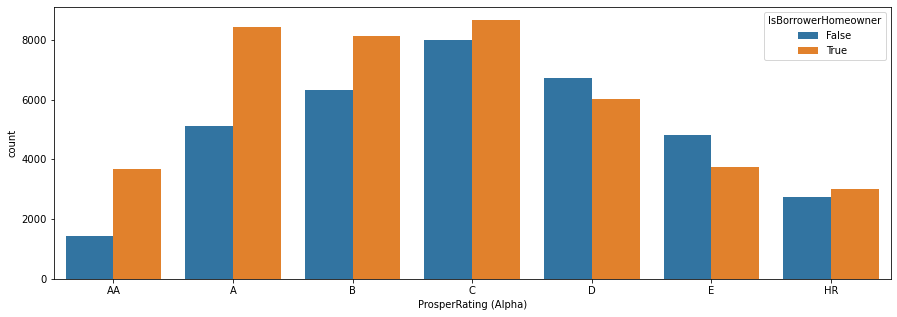

In [32]:
plt.figure(figsize = [15,5])
sb.countplot(data = df2, x = 'ProsperRating (Alpha)', hue = 'IsBorrowerHomeowner', order=order );

Surprisingly, owning a property has no influence on risk rating!

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We observe a greater rating risk with higher APR, and with bigger loan amount borrower pick less risky plans, and that also goes with people with high income range choose less risky plans, and owning a property does not have a significant influence on taking risks.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a negative relation between APR and loan amount, as the bigger the loan amount, the lower the APR, and a surprising stronger relationship between Open Revolving Accounts and Current CreditLines, and it appears that borrowers prefer the three-year period regardless of the dangers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

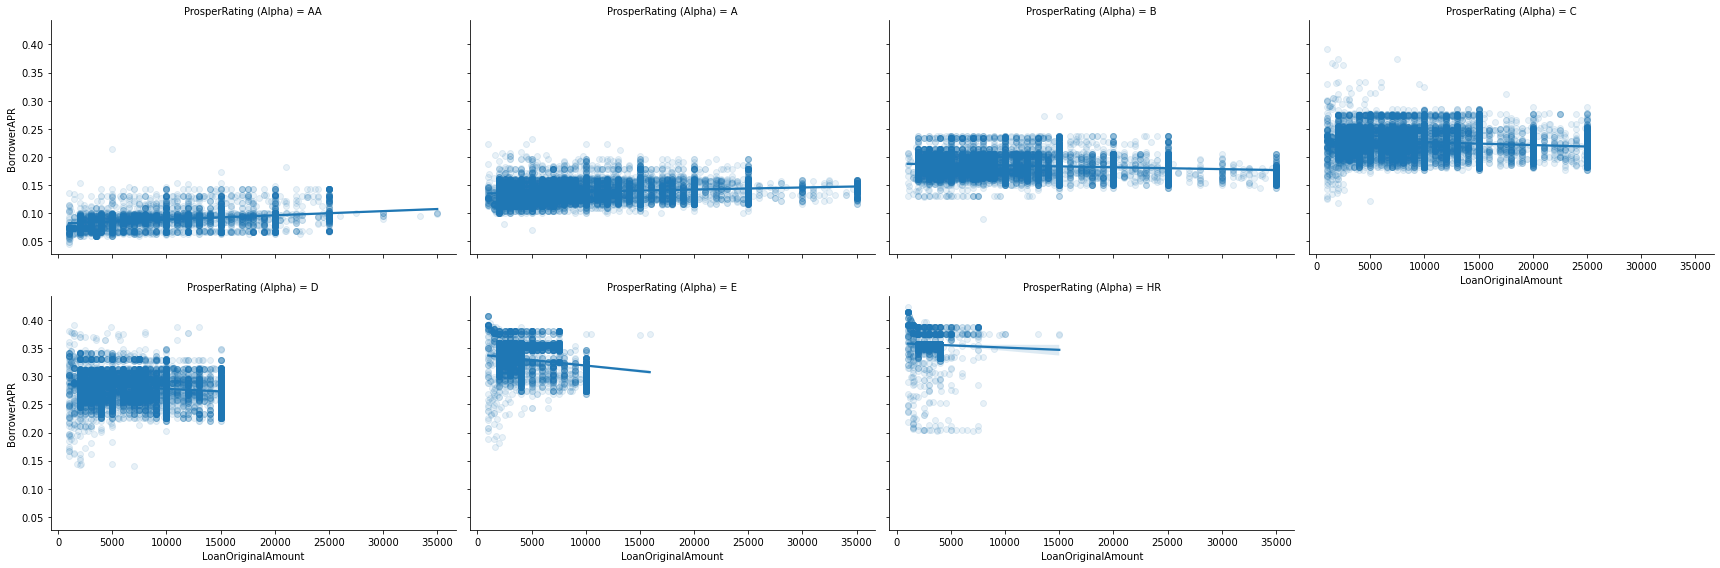

In [41]:
g = sb.FacetGrid(data = df2 , col='ProsperRating (Alpha)' , col_wrap=4 , col_order = order  , height = 4 , aspect = 1.5)
g.map(sb.regplot , 'LoanOriginalAmount' ,'BorrowerAPR',x_jitter = 0.04 , scatter_kws={'alpha':1/10}  )

It appears that as we raise the loan amount, the APR rises in the low risk rating(AA, A, B, C) while falling in the high risk rating (D, E, HR).

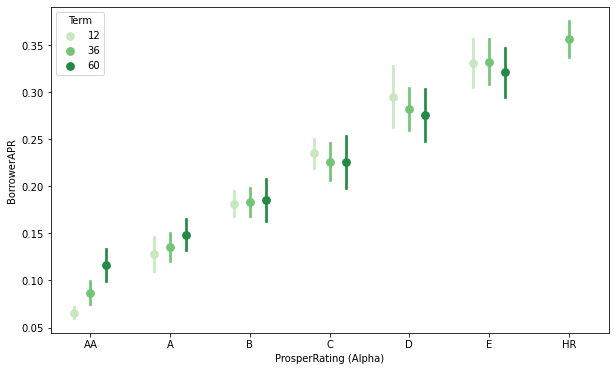

In [66]:
plt.figure(figsize=[10,6])
g = sb.pointplot(data = df2 , x ='ProsperRating (Alpha)' , y = 'BorrowerAPR' , hue = 'Term' , dodge = 0.4 , palette= 'Greens' ,linestyles="" , ci = 'sd' , order = order)

As the term gets bigger, the APR rises in the low risk category, whereas in the high risk rating , the APR falls.

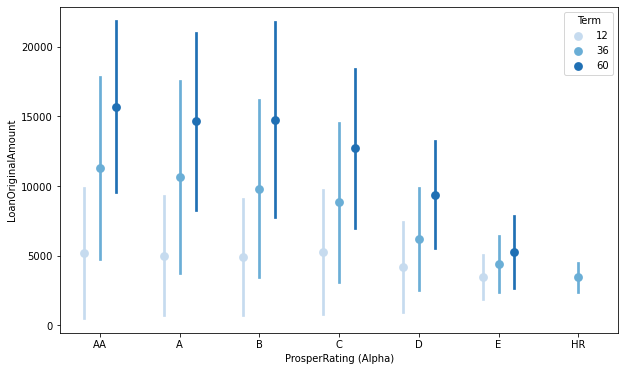

In [70]:
plt.figure(figsize=[10,6])
g = sb.pointplot(data = df2 , x ='ProsperRating (Alpha)' , y = 'LoanOriginalAmount' , hue = 'Term' , dodge = 0.4 , palette= 'Blues' ,linestyles="" , ci = 'sd' , order = order)

We find that as the term gets longer, the loan amount increases in all ratings, but the loan amount decreases significantly in much higher risks, and the gap between loan amounts in different terms becomes relatively small.

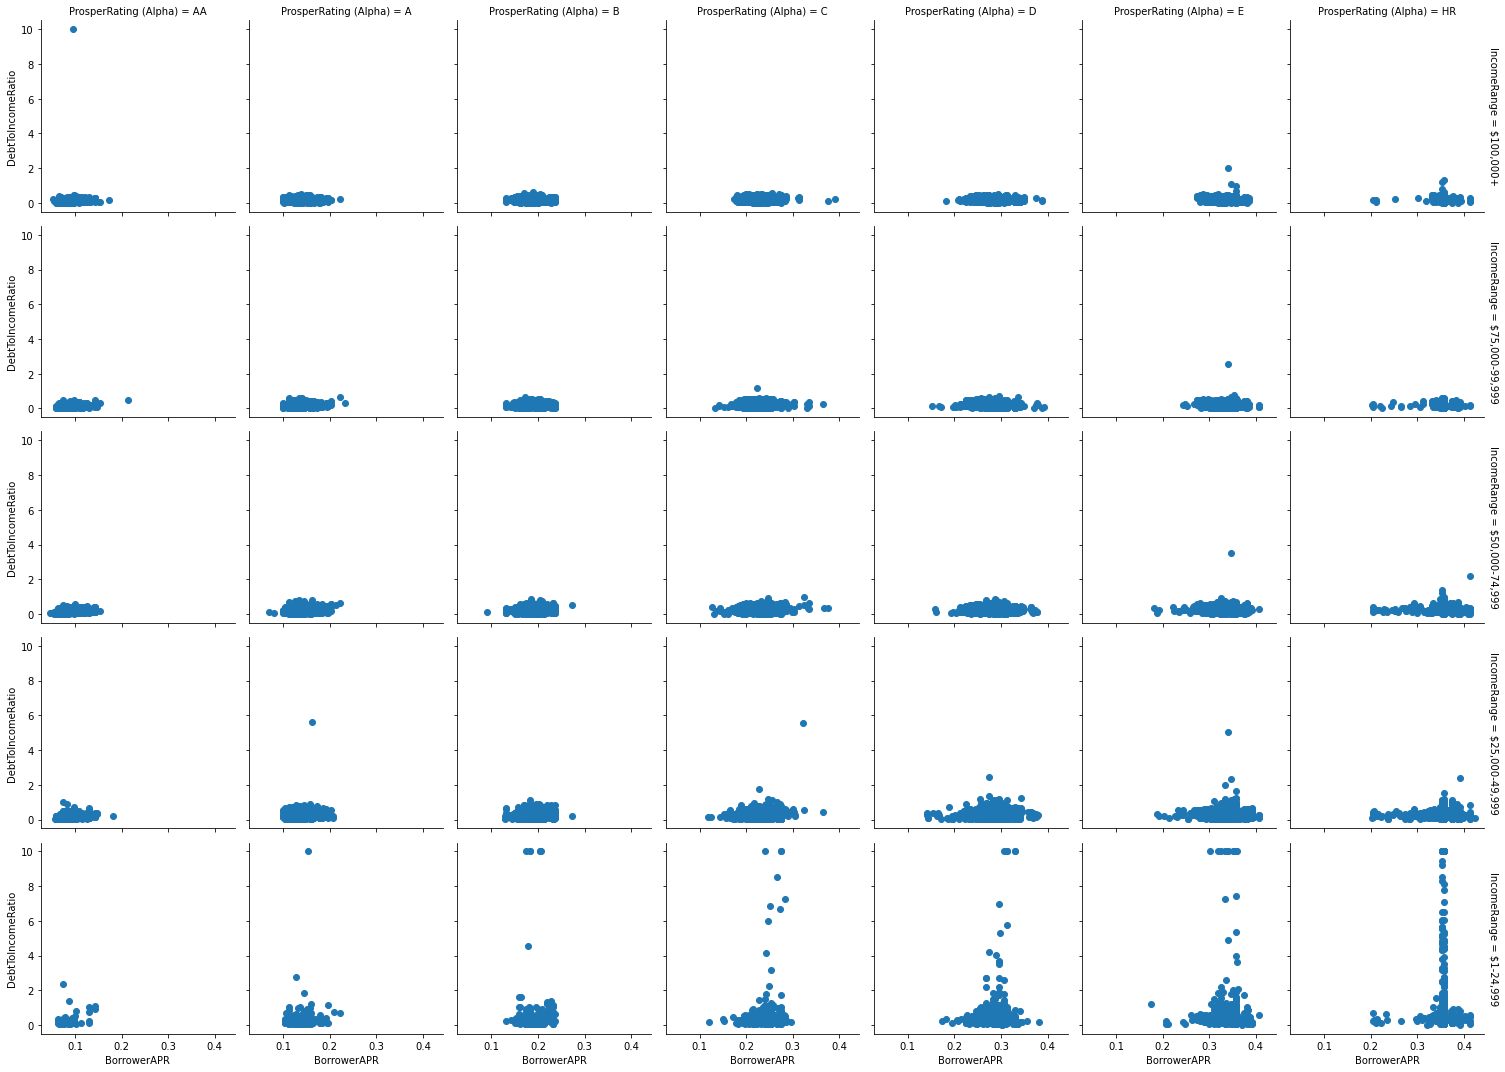

In [80]:
g = sb.FacetGrid(data = df2 , col='ProsperRating (Alpha)'  , col_order = order  , row = 'IncomeRange' , row_order= income_order , margin_titles=True)
g.map(plt.scatter, 'BorrowerAPR', 'DebtToIncomeRatio');

We can see that those with low incomes ranging from 1 to 25,000 chose larger debt with higher risks, resulting in increased debt-to-income ratio, which is why the borrower APR peaks at 0.36 .

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> in low risks you the loan amount in creases when the term incerase and aslo in low risks the borrower APR go high when the loan amount increase Or the loan term increase <br> in the other hand in high risks the loan amount decrese however the term is also the borrower APR go low when the loan amount decrese Or the laon term decrese .


### Were there any interesting or surprising interactions between features?

> As the debt-to-income ratio rises, so does the borrower's APR, with a huge peak in 0.36 APR in the low-income range.